In [46]:
import keras

# Load the MNIST dataset using Keras
mnist = keras.datasets.mnist

# Split the dataset into training and testing sets
# x_train and y_train are the features and labels for the training set
# x_test and y_test are the features and labels for the testing set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# The MNIST dataset consists of 28x28 pixel grayscale images of handwritten digits (0 through 9).
# x_train and x_test contain the image data as 3D arrays, where each element represents the pixel intensity.
# y_train and y_test contain the corresponding labels indicating the actual digit (ground truth) for each image.


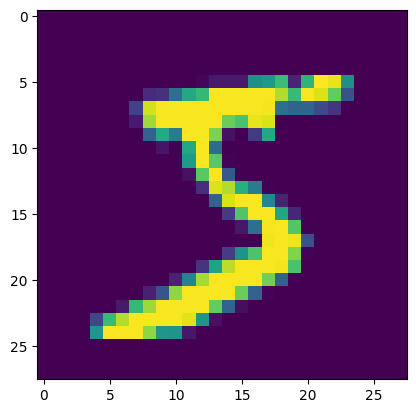

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [55]:
import matplotlib.pyplot as plt

# Import the necessary libraries

# Display the first training image using matplotlib
plt.imshow(x_train[0])

# Show the plotted image
plt.show()

# Print the label (digit) corresponding to the first training image
print(y_train[0])

# The plt.imshow() function is used to display the image at index 0 from the x_train dataset.
# This image represents a handwritten digit from the MNIST dataset.

# plt.show() is called to display the plotted image.

# Finally, the corresponding label (digit) for the first training image is printed using print(y_train[0]).
# This label represents the actual digit that the handwritten image is supposed to depict.


In [48]:
# Reshape the training and testing data to add a channel dimension (1 for grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the input shape for the neural network (28x28 image with 1 channel for grayscale)
input_shape = (28, 28, 1)

# Convert the pixel values to floating-point numbers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the pixel values to the range [0, 1] by dividing by the maximum pixel value (255)
x_train /= 255
x_test /= 255


In [49]:
# Print the original label for the first training example
print(y_train[0])

# Convert the labels to one-hot encoded format using Keras's to_categorical function
# The '10' in the arguments indicates the number of classes (digits 0 through 9)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Print the one-hot encoded label for the first training example
print(y_train[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [50]:
# Create a Sequential model
model = keras.models.Sequential()

# First Convolutional Layer with 32 filters and a 3x3 kernel, using 'relu' activation
# input_shape specifies the shape of the input data
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Second Convolutional Layer with 64 filters and a 3x3 kernel, using 'relu' activation
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

# MaxPooling Layer to downsample the spatial dimensions
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Dropout Layer to prevent overfitting by randomly setting a fraction of input units to zero during training
model.add(keras.layers.Dropout(0.25))

# Flatten Layer to convert the 2D matrix data to a vector for the Dense layers
model.add(keras.layers.Flatten())

# Dense Layer with 128 neurons and 'relu' activation
model.add(keras.layers.Dense(128, activation='relu'))

# Dropout Layer for regularization
model.add(keras.layers.Dropout(0.5))

# Output Dense Layer with 10 neurons (for 10 classes) and 'softmax' activation for multi-class classification
model.add(keras.layers.Dense(10, activation='softmax'))



In [53]:
# Compile the model with categorical crossentropy loss, Adadelta optimizer, and accuracy metric
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the model using the training data for 9 epochs
# Batch size is set to 128, and validation data is provided for evaluation
model.fit(x_train, y_train,
          batch_size=128,
          epochs=9,
          validation_data=(x_test, y_test))


Epoch 1/9
469/469 [==============================] - 145s 307ms/step - loss: 2.2039 - accuracy: 0.2445 - val_loss: 2.1411 - val_accuracy: 0.4668
Epoch 2/9
469/469 [==============================] - 140s 299ms/step - loss: 2.1061 - accuracy: 0.3694 - val_loss: 2.0151 - val_accuracy: 0.6360
Epoch 3/9
469/469 [==============================] - 138s 295ms/step - loss: 1.9762 - accuracy: 0.4708 - val_loss: 1.8503 - val_accuracy: 0.7163
Epoch 4/9
469/469 [==============================] - 146s 311ms/step - loss: 1.8172 - accuracy: 0.5413 - val_loss: 1.6506 - val_accuracy: 0.7500
Epoch 5/9
469/469 [==============================] - 140s 298ms/step - loss: 1.6369 - accuracy: 0.5892 - val_loss: 1.4337 - val_accuracy: 0.7763
Epoch 6/9
469/469 [==============================] - 143s 305ms/step - loss: 1.4581 - accuracy: 0.6246 - val_loss: 1.2293 - val_accuracy: 0.7968
Epoch 7/9
469/469 [==============================] - 139s 297ms/step - loss: 1.2988 - accuracy: 0.6542 - val_loss: 1.0576 - val_ac

In [56]:
# Evaluate the model on the test set and print the results
evaluation_result = model.evaluate(x_test, y_test)

# Print the evaluation result, which includes the loss and metric values
print(evaluation_result)


313/313 [==============================] - 6s 19ms/step - loss: 0.8223 - accuracy: 0.8319
[0.8223133683204651, 0.8319000005722046]
